In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
import sys; sys.path.insert(0, '/global/homes/e/elliek/kdcount')

from kdcount import KDTree, KDAttr
from kdcount.utils import constant_array

import healpy

import numpy as np
from numpy.testing import assert_equal, run_module_suite
from scipy.interpolate import griddata

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import rcParams
rcParams["image.interpolation"] = "nearest"
rcParams["image.aspect"] = "equal"

In [5]:
catdir = '/global/homes/e/elliek/imaginglss/imaginglss/nersc/LRG/'
ra_gal, dec_gal = np.loadtxt(catdir+'LRG.txt.FLUXES', usecols=(0,1), unpack=True)
ra_ran, dec_ran = np.loadtxt(catdir+'LRG_rand.txt.NOISES', usecols=(0,1), unpack=True)
fc_ran = np.loadtxt(catdir+'LRG_rand.txt.FC', unpack=True)

In [92]:
rr = np.random.uniform(0,1,len(fc_ran))
ra_ran_res = ra_ran[rr < fc_ran]
dec_ran_res = dec_ran[rr < fc_ran]
fc_ran_res = fc_ran[rr < fc_ran]

In [93]:
nside = 2**8

In [94]:
pid_gal = healpy.ang2pix(nside, pi * (0.5 - dec_gal / 180), ra_gal / 180 * pi)
pid_ran = healpy.ang2pix(nside, pi * (0.5 - dec_ran_res / 180), ra_ran_res / 180 * pi)

In [95]:
ngal = bincount(pid_gal, minlength = healpy.nside2npix(nside))
nran = bincount(pid_ran, minlength = healpy.nside2npix(nside))

In [97]:
rescale = len(ra_ran)*1.0/len(ra_gal)
print rescale
nran = nran/rescale

10.0259844596


/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: RuntimeWarning: divide by zero encountered in divide
  if __name__ == '__main__':
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':


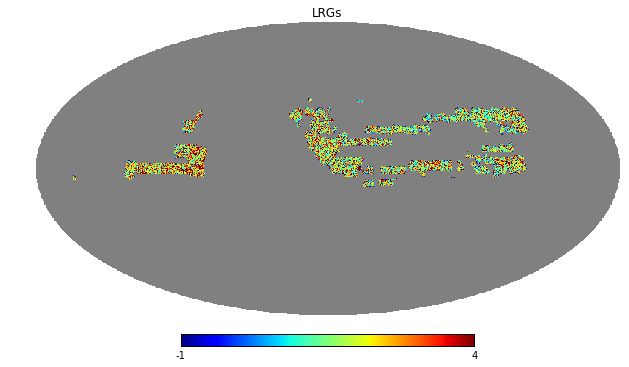

In [98]:
healpy.mollview(ngal/nran-1, min=-1, max = 4, rot=(-120,0,0), title='LRGs')